In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import os
import nltk

from nltk.tokenize import word_tokenize

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
fp_2022 = "/Users/aaryanpotdar/Desktop/Kaggle_CLEF/json_files/2022_path"
fp_2023 = "/Users/aaryanpotdar/Desktop/Kaggle_CLEF/json_files/2023_path"


In [3]:
df_2022 = pd.DataFrame()

In [4]:
for file_name in os.listdir(fp_2022):
    if file_name.endswith('.json'):
        file_path = os.path.join(fp_2022, file_name)
        with open(file_path, 'r') as file:
            data = json.load(file)
        
        for post in data.get('posts',[]):
            df = pd.DataFrame([post])
            
            df['ID'] = file_name.replace('.json', '')
        
            df_2022 = pd.concat([df_2022, df], ignore_index=True)

In [5]:
df_2022.columns[0]

'title'

In [6]:
df_2023 = pd.DataFrame()

In [7]:
for file_name in os.listdir(fp_2023):
    if file_name.endswith('.json'):
        file_path = os.path.join(fp_2023, file_name)

        with open(file_path, 'r') as file:
            data = json.load(file)
        
        for post in data.get('posts',[]):
            df = pd.DataFrame([post])
            df['ID'] = file_name.replace('.json', '')
        
            df_2023 = pd.concat([df_2023, df], ignore_index=True)

In [8]:
df_2023

,title,date,info,text,ID
0,b' ',b'2022-10-17 11:48:35',reddit post,b'cramming tooo!! add me to any study gc so we...,eRisk2023-T3_Subject33
1,b' ',b'2022-10-10 20:42:24',reddit post,b'count me in please!',eRisk2023-T3_Subject33
2,b'food goes back up',b'2022-09-28 17:33:56',reddit post,b'does anyone else experience this? ive been t...,eRisk2023-T3_Subject33
3,b'i\xe2\x80\x99m glad my mom died thoughts',b'2022-09-23 19:34:59',reddit post,b'not sure if anyone\xe2\x80\x99s read the boo...,eRisk2023-T3_Subject33
4,b'i hate myself too much',b'2022-06-20 18:56:49',reddit post,b'i cant stop binge purging :( i need help so ...,eRisk2023-T3_Subject33
...,...,...,...,...,...
19422,b' ',b'2014-04-04 22:49:31',reddit post,b'I assumed Xbox or PS3 because the console ve...,eRisk2023-T3_Subject26
19423,b' ',b'2014-04-04 19:25:50',reddit post,b'Xbox or PS3?',eRisk2023-T3_Subject26
19424,b' ',b'2014-04-03 08:48:18',reddit post,"b""Add me man GT : iGoD MaNiAcS Zz\nI've got a ...",eRisk2023-T3_Subject26
19425,b' ',b'2014-04-02 20:20:18',reddit post,b'Add me\nGT: iGoD MaNiAcS Zz',eRisk2023-T3_Subject26


In [9]:
#removing b'' in byte string format
def clean_text(item):
    if isinstance(item, str) and item.startswith("b'") and item.endswith("'"):
        return item[2:-1]  # Remove the first two and the last character
    return item

In [10]:
df_2023 = df_2023.map(clean_text)

In [11]:
df_2023

,title,date,info,text,ID
0,,2022-10-17 11:48:35,reddit post,cramming tooo!! add me to any study gc so we c...,eRisk2023-T3_Subject33
1,,2022-10-10 20:42:24,reddit post,count me in please!,eRisk2023-T3_Subject33
2,food goes back up,2022-09-28 17:33:56,reddit post,does anyone else experience this? ive been try...,eRisk2023-T3_Subject33
3,i\xe2\x80\x99m glad my mom died thoughts,2022-09-23 19:34:59,reddit post,"not sure if anyone\xe2\x80\x99s read the book,...",eRisk2023-T3_Subject33
4,i hate myself too much,2022-06-20 18:56:49,reddit post,i cant stop binge purging :( i need help so ba...,eRisk2023-T3_Subject33
...,...,...,...,...,...
19422,,2014-04-04 22:49:31,reddit post,I assumed Xbox or PS3 because the console vers...,eRisk2023-T3_Subject26
19423,,2014-04-04 19:25:50,reddit post,Xbox or PS3?,eRisk2023-T3_Subject26
19424,,2014-04-03 08:48:18,reddit post,"b""Add me man GT : iGoD MaNiAcS Zz\nI've got a ...",eRisk2023-T3_Subject26
19425,,2014-04-02 20:20:18,reddit post,Add me\nGT: iGoD MaNiAcS Zz,eRisk2023-T3_Subject26


In [12]:
text_length = len(df_2022['text'].iloc[0])
print(f'Length of a sample text: {text_length}')

Length of a sample text: 74


In [13]:
text_length = len(df_2023['text'].iloc[0])
print(f'Length of a sample text: {text_length}')

Length of a sample text: 79


In [14]:
df_2022['length'] = df_2022['text'].str.len()
df_2022.head(10)

,title,date,info,text,ID,length
0,,2021-11-20 16:44:19,reddit post,"yoga is vvvv helpful for me, do it slowly and ...",eRisk2022-T3_Subject4,74
1,,2021-11-20 16:42:20,reddit post,oml im so proud of you!!!! keep it up!!!!,eRisk2022-T3_Subject4,41
2,,2021-11-02 16:21:35,reddit post,update!!! did eat dinner last night and had a ...,eRisk2022-T3_Subject4,88
3,shout out,2021-11-02 00:58:17,reddit post,j a little appreciation post bc this is the on...,eRisk2022-T3_Subject4,142
4,,2021-11-01 12:59:17,reddit post,from my understanding you can keep them until ...,eRisk2022-T3_Subject4,153
5,,2021-10-30 14:54:57,reddit post,bc same i would work out but my legs j got big...,eRisk2022-T3_Subject4,70
6,,2021-10-30 14:54:35,reddit post,honestly trying to be perceived as strong inst...,eRisk2022-T3_Subject4,93
7,,2021-10-29 22:49:26,reddit post,yes all the time lmfao...it’s embarrassing the...,eRisk2022-T3_Subject4,111
8,,2021-10-27 20:43:13,reddit post,OMFG GOOD JOB,eRisk2022-T3_Subject4,13
9,,2021-10-26 21:35:37,reddit post,"im so sorry, this is a very scary place to be ...",eRisk2022-T3_Subject4,169


In [15]:
df_2023['length'] = df_2023['text'].str.len()
df_2023.head(10)

,title,date,info,text,ID,length
0,,2022-10-17 11:48:35,reddit post,cramming tooo!! add me to any study gc so we c...,eRisk2023-T3_Subject33,79
1,,2022-10-10 20:42:24,reddit post,count me in please!,eRisk2023-T3_Subject33,19
2,food goes back up,2022-09-28 17:33:56,reddit post,does anyone else experience this? ive been try...,eRisk2023-T3_Subject33,228
3,i\xe2\x80\x99m glad my mom died thoughts,2022-09-23 19:34:59,reddit post,"not sure if anyone\xe2\x80\x99s read the book,...",eRisk2023-T3_Subject33,261
4,i hate myself too much,2022-06-20 18:56:49,reddit post,i cant stop binge purging :( i need help so ba...,eRisk2023-T3_Subject33,87
5,,2022-06-19 13:14:56,reddit post,aghh im terrified to tel my family :( happy fo...,eRisk2023-T3_Subject33,53
6,how did you tell a loved one?,2022-06-18 16:50:10,reddit post,hi! i\xe2\x80\x99ve been purging (not binging ...,eRisk2023-T3_Subject33,511
7,,2022-06-17 18:03:46,reddit post,thank you :(,eRisk2023-T3_Subject33,12
8,period questions,2022-06-16 18:34:14,reddit post,"hello! for girls who deal w purging, did you h...",eRisk2023-T3_Subject33,259
9,,2022-06-16 17:47:45,reddit post,thank you so much for this :( i hope you\xe2\x...,eRisk2023-T3_Subject33,67


In [16]:
# Word Count: Number of words in a review
word_count = df_2022['text'].iloc[0].split()
print(f'Word count in a sample text: {len(word_count)}')

Word count in a sample text: 14


In [17]:
word_count = df_2023['text'].iloc[0].split()
print(f'Word count in a sample text: {len(word_count)}')

Word count in a sample text: 14


In [18]:
def word_count(text):
    text_list = text.split()
    return len(text_list)

In [19]:
df_2022['word_count'] = df_2022['text'].apply(word_count)
df_2022.head(10)

,title,date,info,text,ID,length,word_count
0,,2021-11-20 16:44:19,reddit post,"yoga is vvvv helpful for me, do it slowly and ...",eRisk2022-T3_Subject4,74,14
1,,2021-11-20 16:42:20,reddit post,oml im so proud of you!!!! keep it up!!!!,eRisk2022-T3_Subject4,41,9
2,,2021-11-02 16:21:35,reddit post,update!!! did eat dinner last night and had a ...,eRisk2022-T3_Subject4,88,15
3,shout out,2021-11-02 00:58:17,reddit post,j a little appreciation post bc this is the on...,eRisk2022-T3_Subject4,142,29
4,,2021-11-01 12:59:17,reddit post,from my understanding you can keep them until ...,eRisk2022-T3_Subject4,153,26
5,,2021-10-30 14:54:57,reddit post,bc same i would work out but my legs j got big...,eRisk2022-T3_Subject4,70,15
6,,2021-10-30 14:54:35,reddit post,honestly trying to be perceived as strong inst...,eRisk2022-T3_Subject4,93,17
7,,2021-10-29 22:49:26,reddit post,yes all the time lmfao...it’s embarrassing the...,eRisk2022-T3_Subject4,111,19
8,,2021-10-27 20:43:13,reddit post,OMFG GOOD JOB,eRisk2022-T3_Subject4,13,3
9,,2021-10-26 21:35:37,reddit post,"im so sorry, this is a very scary place to be ...",eRisk2022-T3_Subject4,169,35


In [20]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19427 entries, 0 to 19426
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   19427 non-null  object
 1   date    19427 non-null  object
 2   info    19427 non-null  object
 3   text    19427 non-null  object
 4   ID      19427 non-null  object
 5   length  19427 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 910.8+ KB


In [21]:
df_2023['word_count'] = df_2023['text'].apply(word_count)
df_2023.head(10)

,title,date,info,text,ID,length,word_count
0,,2022-10-17 11:48:35,reddit post,cramming tooo!! add me to any study gc so we c...,eRisk2023-T3_Subject33,79,14
1,,2022-10-10 20:42:24,reddit post,count me in please!,eRisk2023-T3_Subject33,19,4
2,food goes back up,2022-09-28 17:33:56,reddit post,does anyone else experience this? ive been try...,eRisk2023-T3_Subject33,228,43
3,i\xe2\x80\x99m glad my mom died thoughts,2022-09-23 19:34:59,reddit post,"not sure if anyone\xe2\x80\x99s read the book,...",eRisk2023-T3_Subject33,261,45
4,i hate myself too much,2022-06-20 18:56:49,reddit post,i cant stop binge purging :( i need help so ba...,eRisk2023-T3_Subject33,87,16
5,,2022-06-19 13:14:56,reddit post,aghh im terrified to tel my family :( happy fo...,eRisk2023-T3_Subject33,53,11
6,how did you tell a loved one?,2022-06-18 16:50:10,reddit post,hi! i\xe2\x80\x99ve been purging (not binging ...,eRisk2023-T3_Subject33,511,93
7,,2022-06-17 18:03:46,reddit post,thank you :(,eRisk2023-T3_Subject33,12,3
8,period questions,2022-06-16 18:34:14,reddit post,"hello! for girls who deal w purging, did you h...",eRisk2023-T3_Subject33,259,45
9,,2022-06-16 17:47:45,reddit post,thank you so much for this :( i hope you\xe2\x...,eRisk2023-T3_Subject33,67,12


In [22]:
# Mean word length: average length of words
df_2022['mean_word_length'] = df_2022['text'].map(lambda text: np.mean([len(word) for word in text.split()]))
df_2022.head(10)

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,title,date,info,text,ID,length,word_count,mean_word_length
0,,2021-11-20 16:44:19,reddit post,"yoga is vvvv helpful for me, do it slowly and ...",eRisk2022-T3_Subject4,74,14,4.357143
1,,2021-11-20 16:42:20,reddit post,oml im so proud of you!!!! keep it up!!!!,eRisk2022-T3_Subject4,41,9,3.666667
2,,2021-11-02 16:21:35,reddit post,update!!! did eat dinner last night and had a ...,eRisk2022-T3_Subject4,88,15,4.933333
3,shout out,2021-11-02 00:58:17,reddit post,j a little appreciation post bc this is the on...,eRisk2022-T3_Subject4,142,29,3.931034
4,,2021-11-01 12:59:17,reddit post,from my understanding you can keep them until ...,eRisk2022-T3_Subject4,153,26,4.923077
5,,2021-10-30 14:54:57,reddit post,bc same i would work out but my legs j got big...,eRisk2022-T3_Subject4,70,15,3.733333
6,,2021-10-30 14:54:35,reddit post,honestly trying to be perceived as strong inst...,eRisk2022-T3_Subject4,93,17,4.529412
7,,2021-10-29 22:49:26,reddit post,yes all the time lmfao...it’s embarrassing the...,eRisk2022-T3_Subject4,111,19,4.894737
8,,2021-10-27 20:43:13,reddit post,OMFG GOOD JOB,eRisk2022-T3_Subject4,13,3,3.666667
9,,2021-10-26 21:35:37,reddit post,"im so sorry, this is a very scary place to be ...",eRisk2022-T3_Subject4,169,35,3.857143


In [23]:
df_2023['mean_word_length'] = df_2023['text'].map(lambda text: np.mean([len(word) for word in text.split()]))
df_2023.head(10)

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,title,date,info,text,ID,length,word_count,mean_word_length
0,,2022-10-17 11:48:35,reddit post,cramming tooo!! add me to any study gc so we c...,eRisk2023-T3_Subject33,79,14,4.714286
1,,2022-10-10 20:42:24,reddit post,count me in please!,eRisk2023-T3_Subject33,19,4,4.000000
2,food goes back up,2022-09-28 17:33:56,reddit post,does anyone else experience this? ive been try...,eRisk2023-T3_Subject33,228,43,4.325581
3,i\xe2\x80\x99m glad my mom died thoughts,2022-09-23 19:34:59,reddit post,"not sure if anyone\xe2\x80\x99s read the book,...",eRisk2023-T3_Subject33,261,45,4.822222
4,i hate myself too much,2022-06-20 18:56:49,reddit post,i cant stop binge purging :( i need help so ba...,eRisk2023-T3_Subject33,87,16,4.500000
5,,2022-06-19 13:14:56,reddit post,aghh im terrified to tel my family :( happy fo...,eRisk2023-T3_Subject33,53,11,3.909091
6,how did you tell a loved one?,2022-06-18 16:50:10,reddit post,hi! i\xe2\x80\x99ve been purging (not binging ...,eRisk2023-T3_Subject33,511,93,4.505376
7,,2022-06-17 18:03:46,reddit post,thank you :(,eRisk2023-T3_Subject33,12,3,3.333333
8,period questions,2022-06-16 18:34:14,reddit post,"hello! for girls who deal w purging, did you h...",eRisk2023-T3_Subject33,259,45,4.777778
9,,2022-06-16 17:47:45,reddit post,thank you so much for this :( i hope you\xe2\x...,eRisk2023-T3_Subject33,67,12,4.666667


In [24]:
# Mean sentence length: Average length of the sentences in the review
np.mean([len(sentence) for sentence in tokenize.sent_tokenize(df_2022['text'].iloc[0])])

74.0

In [25]:
np.mean([len(sentence) for sentence in tokenize.sent_tokenize(df_2023['text'].iloc[0])])

39.0

In [26]:
df_2022['mean_sent_length'] = df_2022['text'].map(lambda text: np.mean([len(text) for sent in tokenize.sent_tokenize(text)]))
df_2022.head(10)

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,title,date,info,text,ID,length,word_count,mean_word_length,mean_sent_length
0,,2021-11-20 16:44:19,reddit post,"yoga is vvvv helpful for me, do it slowly and ...",eRisk2022-T3_Subject4,74,14,4.357143,74.0
1,,2021-11-20 16:42:20,reddit post,oml im so proud of you!!!! keep it up!!!!,eRisk2022-T3_Subject4,41,9,3.666667,41.0
2,,2021-11-02 16:21:35,reddit post,update!!! did eat dinner last night and had a ...,eRisk2022-T3_Subject4,88,15,4.933333,88.0
3,shout out,2021-11-02 00:58:17,reddit post,j a little appreciation post bc this is the on...,eRisk2022-T3_Subject4,142,29,3.931034,142.0
4,,2021-11-01 12:59:17,reddit post,from my understanding you can keep them until ...,eRisk2022-T3_Subject4,153,26,4.923077,153.0
5,,2021-10-30 14:54:57,reddit post,bc same i would work out but my legs j got big...,eRisk2022-T3_Subject4,70,15,3.733333,70.0
6,,2021-10-30 14:54:35,reddit post,honestly trying to be perceived as strong inst...,eRisk2022-T3_Subject4,93,17,4.529412,93.0
7,,2021-10-29 22:49:26,reddit post,yes all the time lmfao...it’s embarrassing the...,eRisk2022-T3_Subject4,111,19,4.894737,111.0
8,,2021-10-27 20:43:13,reddit post,OMFG GOOD JOB,eRisk2022-T3_Subject4,13,3,3.666667,13.0
9,,2021-10-26 21:35:37,reddit post,"im so sorry, this is a very scary place to be ...",eRisk2022-T3_Subject4,169,35,3.857143,169.0


In [27]:
df_2023['mean_sent_length'] = df_2023['text'].map(lambda text: np.mean([len(text) for sent in tokenize.sent_tokenize(text)]))
df_2023.head(10)

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,title,date,info,text,ID,length,word_count,mean_word_length,mean_sent_length
0,,2022-10-17 11:48:35,reddit post,cramming tooo!! add me to any study gc so we c...,eRisk2023-T3_Subject33,79,14,4.714286,79.0
1,,2022-10-10 20:42:24,reddit post,count me in please!,eRisk2023-T3_Subject33,19,4,4.000000,19.0
2,food goes back up,2022-09-28 17:33:56,reddit post,does anyone else experience this? ive been try...,eRisk2023-T3_Subject33,228,43,4.325581,228.0
3,i\xe2\x80\x99m glad my mom died thoughts,2022-09-23 19:34:59,reddit post,"not sure if anyone\xe2\x80\x99s read the book,...",eRisk2023-T3_Subject33,261,45,4.822222,261.0
4,i hate myself too much,2022-06-20 18:56:49,reddit post,i cant stop binge purging :( i need help so ba...,eRisk2023-T3_Subject33,87,16,4.500000,87.0
5,,2022-06-19 13:14:56,reddit post,aghh im terrified to tel my family :( happy fo...,eRisk2023-T3_Subject33,53,11,3.909091,53.0
6,how did you tell a loved one?,2022-06-18 16:50:10,reddit post,hi! i\xe2\x80\x99ve been purging (not binging ...,eRisk2023-T3_Subject33,511,93,4.505376,511.0
7,,2022-06-17 18:03:46,reddit post,thank you :(,eRisk2023-T3_Subject33,12,3,3.333333,12.0
8,period questions,2022-06-16 18:34:14,reddit post,"hello! for girls who deal w purging, did you h...",eRisk2023-T3_Subject33,259,45,4.777778,259.0
9,,2022-06-16 17:47:45,reddit post,thank you so much for this :( i hope you\xe2\x...,eRisk2023-T3_Subject33,67,12,4.666667,67.0


In [28]:
def visualize(df, features):
    sns.set(style='whitegrid')
    num_plots = len(features)
    fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 5 * num_plots))
    
    fig.tight_layout(pad=5.0)
    
    for i, feature in enumerate(features):
        ax = axes[i] if num_plots > 1 else axes
        sns.boxplot(x=df[feature], ax=ax)
        ax.set_title(f'Box plot of {feature}', fontsize=15)
        
    plt.show()

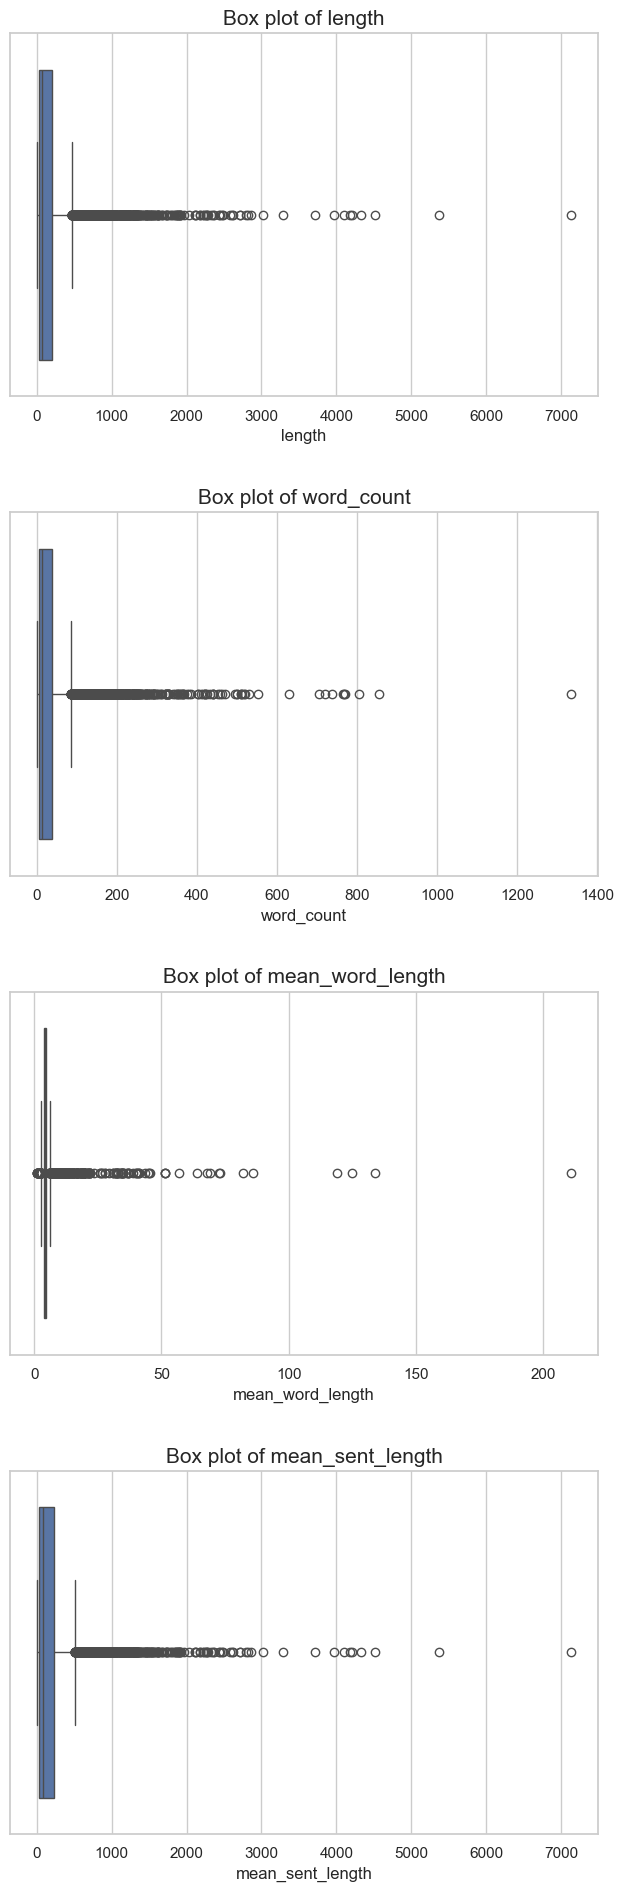

In [29]:
features = df_2022.columns.tolist()[5:]
visualize(df_2022, features)

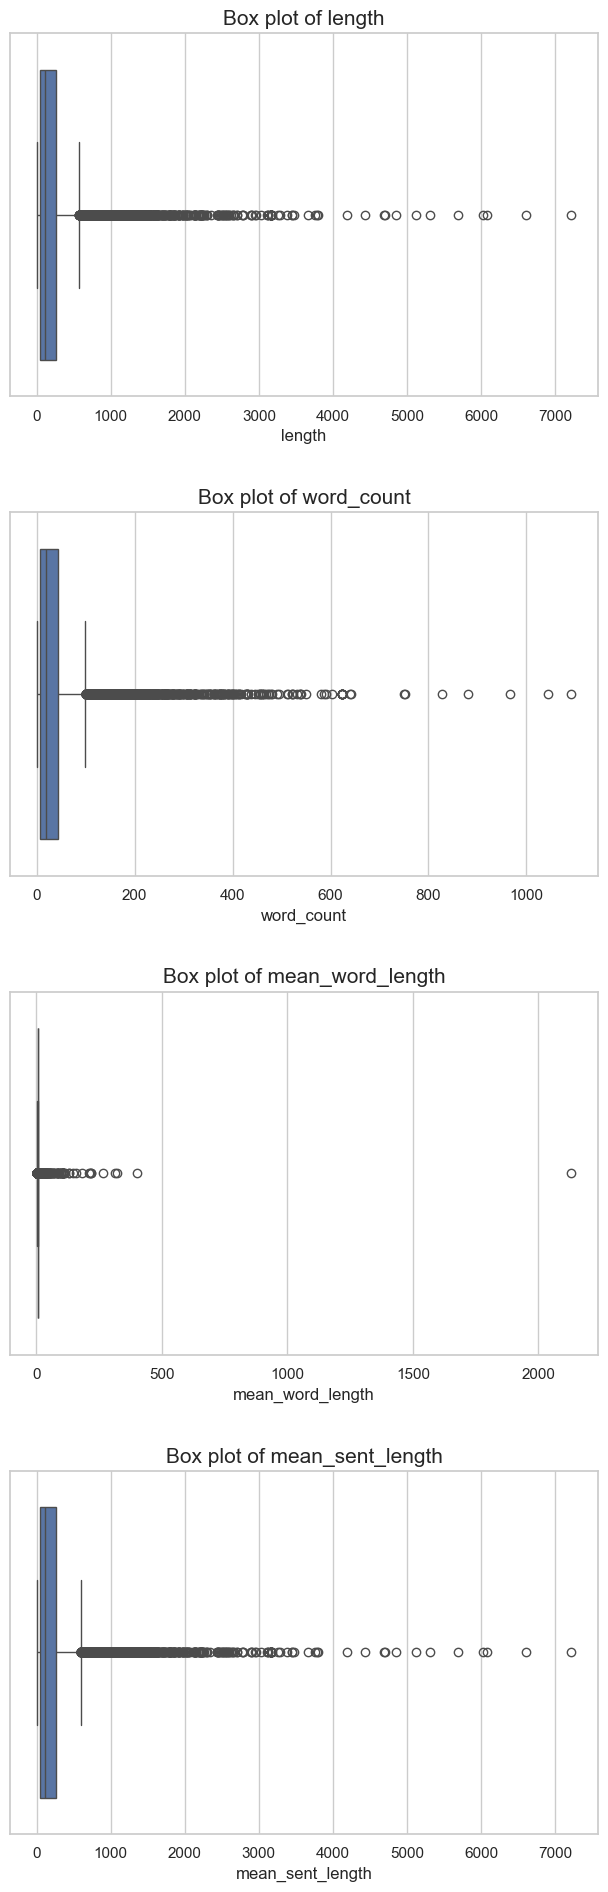

In [30]:
features = df_2023.columns.tolist()[5:]
visualize(df_2023, features)

In [31]:
# Term frequency analysis
df_2022_freq = df_2022.drop(features, axis=1)
df_2022_freq.head()

,title,date,info,text,ID
0,,2021-11-20 16:44:19,reddit post,"yoga is vvvv helpful for me, do it slowly and ...",eRisk2022-T3_Subject4
1,,2021-11-20 16:42:20,reddit post,oml im so proud of you!!!! keep it up!!!!,eRisk2022-T3_Subject4
2,,2021-11-02 16:21:35,reddit post,update!!! did eat dinner last night and had a ...,eRisk2022-T3_Subject4
3,shout out,2021-11-02 00:58:17,reddit post,j a little appreciation post bc this is the on...,eRisk2022-T3_Subject4
4,,2021-11-01 12:59:17,reddit post,from my understanding you can keep them until ...,eRisk2022-T3_Subject4


In [32]:
df_2023_freq = df_2023.drop(features, axis=1)
df_2023_freq.head()

,title,date,info,text,ID
0,,2022-10-17 11:48:35,reddit post,cramming tooo!! add me to any study gc so we c...,eRisk2023-T3_Subject33
1,,2022-10-10 20:42:24,reddit post,count me in please!,eRisk2023-T3_Subject33
2,food goes back up,2022-09-28 17:33:56,reddit post,does anyone else experience this? ive been try...,eRisk2023-T3_Subject33
3,i\xe2\x80\x99m glad my mom died thoughts,2022-09-23 19:34:59,reddit post,"not sure if anyone\xe2\x80\x99s read the book,...",eRisk2023-T3_Subject33
4,i hate myself too much,2022-06-20 18:56:49,reddit post,i cant stop binge purging :( i need help so ba...,eRisk2023-T3_Subject33


In [33]:
df_2022_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10468 non-null  object
 1   date    10468 non-null  object
 2   info    10468 non-null  object
 3   text    10468 non-null  object
 4   ID      10468 non-null  object
dtypes: object(5)
memory usage: 409.0+ KB


In [34]:
# text needs to be preprocessed -> lowercase, remove punctuation, stopward removal
def clean(text):
    
    text = text.lower()
    text = re.sub('[^a-z A-Z]+', '', text)
    text = " ".join([word for word in text.split() if word not in stopwords.words('english')])
    
    return text

In [35]:
df_2022_freq['text'] = df_2022_freq['text'].apply(clean)
df_2022_freq['title'] = df_2022_freq['title'].apply(clean)
df_2022_freq.head(10)

,title,date,info,text,ID
0,,2021-11-20 16:44:19,reddit post,yoga vvvv helpful slowly concentrate movements,eRisk2022-T3_Subject4
1,,2021-11-20 16:42:20,reddit post,oml im proud keep,eRisk2022-T3_Subject4
2,,2021-11-02 16:21:35,reddit post,update eat dinner last night smoothie morning ...,eRisk2022-T3_Subject4
3,shout,2021-11-02 00:58:17,reddit post,j little appreciation post bc place say havent...,eRisk2022-T3_Subject4
4,,2021-11-01 12:59:17,reddit post,understanding keep go bad get rid however see ...,eRisk2022-T3_Subject4
5,,2021-10-30 14:54:57,reddit post,bc would work legs j got bigger instead shrinking,eRisk2022-T3_Subject4
6,,2021-10-30 14:54:35,reddit post,honestly trying perceived strong instead fragi...,eRisk2022-T3_Subject4
7,,2021-10-29 22:49:26,reddit post,yes time lmfaoits embarrassing amount ive drea...,eRisk2022-T3_Subject4
8,,2021-10-27 20:43:13,reddit post,omfg good job,eRisk2022-T3_Subject4
9,,2021-10-26 21:35:37,reddit post,im sorry scary place know imo first step accep...,eRisk2022-T3_Subject4


In [36]:
df_2023_freq['text'] = df_2023_freq['text'].apply(clean)
df_2023_freq['title'] = df_2023_freq['title'].apply(clean)
df_2023_freq.head(10)

,title,date,info,text,ID
0,,2022-10-17 11:48:35,reddit post,cramming tooo add study gc cram together xfxfxxd,eRisk2023-T3_Subject33
1,,2022-10-10 20:42:24,reddit post,count please,eRisk2023-T3_Subject33
2,food goes back,2022-09-28 17:33:56,reddit post,anyone else experience ive trying stop purging...,eRisk2023-T3_Subject33
3,ixexxm glad mom died thoughts,2022-09-23 19:34:59,reddit post,sure anyonexexxs read book thoughts especially...,eRisk2023-T3_Subject33
4,hate much,2022-06-20 18:56:49,reddit post,cant stop binge purging need help badlyxexxa g...,eRisk2023-T3_Subject33
5,,2022-06-19 13:14:56,reddit post,aghh im terrified tel family happy,eRisk2023-T3_Subject33
6,tell loved one,2022-06-18 16:50:10,reddit post,hi ixexxve purging binging though around month...,eRisk2023-T3_Subject33
7,,2022-06-17 18:03:46,reddit post,thank,eRisk2023-T3_Subject33
8,period questions,2022-06-16 18:34:14,reddit post,hello girls deal w purging trouble w late peri...,eRisk2023-T3_Subject33
9,,2022-06-16 17:47:45,reddit post,thank much hope youxexxre better,eRisk2023-T3_Subject33


In [37]:
df_test = df_2022_freq
df_test['contains_numbers'] = df_2022_freq['text'].str.contains(r'\d')
df_test

,title,date,info,text,ID,contains_numbers
0,,2021-11-20 16:44:19,reddit post,yoga vvvv helpful slowly concentrate movements,eRisk2022-T3_Subject4,False
1,,2021-11-20 16:42:20,reddit post,oml im proud keep,eRisk2022-T3_Subject4,False
2,,2021-11-02 16:21:35,reddit post,update eat dinner last night smoothie morning ...,eRisk2022-T3_Subject4,False
3,shout,2021-11-02 00:58:17,reddit post,j little appreciation post bc place say havent...,eRisk2022-T3_Subject4,False
4,,2021-11-01 12:59:17,reddit post,understanding keep go bad get rid however see ...,eRisk2022-T3_Subject4,False
...,...,...,...,...,...,...
10463,,2019-03-26 00:54:09,reddit post,think need info safewords read subreddit told ...,eRisk2022-T3_Subject11,False
10464,,2019-03-26 00:48:23,reddit post,coming place topic sex taboo struggle finally ...,eRisk2022-T3_Subject11,False
10465,,2019-03-26 00:39:14,reddit post,mistaken said might able control told sometime...,eRisk2022-T3_Subject11,False
10466,f still exploring sex life,2019-03-26 00:20:55,reddit post,f still process exploring sex life im still ne...,eRisk2022-T3_Subject11,False


In [38]:
#build text corpus
def corpus(text):
    text_list = text.split()
    return text_list

In [39]:
df_2022_freq['text_list'] = df_2022_freq['text'].apply(corpus)
df_2022_freq.head(10)

,title,date,info,text,ID,contains_numbers,text_list
0,,2021-11-20 16:44:19,reddit post,yoga vvvv helpful slowly concentrate movements,eRisk2022-T3_Subject4,False,"[yoga, vvvv, helpful, slowly, concentrate, mov..."
1,,2021-11-20 16:42:20,reddit post,oml im proud keep,eRisk2022-T3_Subject4,False,"[oml, im, proud, keep]"
2,,2021-11-02 16:21:35,reddit post,update eat dinner last night smoothie morning ...,eRisk2022-T3_Subject4,False,"[update, eat, dinner, last, night, smoothie, m..."
3,shout,2021-11-02 00:58:17,reddit post,j little appreciation post bc place say havent...,eRisk2022-T3_Subject4,False,"[j, little, appreciation, post, bc, place, say..."
4,,2021-11-01 12:59:17,reddit post,understanding keep go bad get rid however see ...,eRisk2022-T3_Subject4,False,"[understanding, keep, go, bad, get, rid, howev..."
5,,2021-10-30 14:54:57,reddit post,bc would work legs j got bigger instead shrinking,eRisk2022-T3_Subject4,False,"[bc, would, work, legs, j, got, bigger, instea..."
6,,2021-10-30 14:54:35,reddit post,honestly trying perceived strong instead fragi...,eRisk2022-T3_Subject4,False,"[honestly, trying, perceived, strong, instead,..."
7,,2021-10-29 22:49:26,reddit post,yes time lmfaoits embarrassing amount ive drea...,eRisk2022-T3_Subject4,False,"[yes, time, lmfaoits, embarrassing, amount, iv..."
8,,2021-10-27 20:43:13,reddit post,omfg good job,eRisk2022-T3_Subject4,False,"[omfg, good, job]"
9,,2021-10-26 21:35:37,reddit post,im sorry scary place know imo first step accep...,eRisk2022-T3_Subject4,False,"[im, sorry, scary, place, know, imo, first, st..."


In [40]:
df_2023_freq['text_list'] = df_2023_freq['text'].apply(corpus)
df_2023_freq.head(10)

,title,date,info,text,ID,text_list
0,,2022-10-17 11:48:35,reddit post,cramming tooo add study gc cram together xfxfxxd,eRisk2023-T3_Subject33,"[cramming, tooo, add, study, gc, cram, togethe..."
1,,2022-10-10 20:42:24,reddit post,count please,eRisk2023-T3_Subject33,"[count, please]"
2,food goes back,2022-09-28 17:33:56,reddit post,anyone else experience ive trying stop purging...,eRisk2023-T3_Subject33,"[anyone, else, experience, ive, trying, stop, ..."
3,ixexxm glad mom died thoughts,2022-09-23 19:34:59,reddit post,sure anyonexexxs read book thoughts especially...,eRisk2023-T3_Subject33,"[sure, anyonexexxs, read, book, thoughts, espe..."
4,hate much,2022-06-20 18:56:49,reddit post,cant stop binge purging need help badlyxexxa g...,eRisk2023-T3_Subject33,"[cant, stop, binge, purging, need, help, badly..."
5,,2022-06-19 13:14:56,reddit post,aghh im terrified tel family happy,eRisk2023-T3_Subject33,"[aghh, im, terrified, tel, family, happy]"
6,tell loved one,2022-06-18 16:50:10,reddit post,hi ixexxve purging binging though around month...,eRisk2023-T3_Subject33,"[hi, ixexxve, purging, binging, though, around..."
7,,2022-06-17 18:03:46,reddit post,thank,eRisk2023-T3_Subject33,[thank]
8,period questions,2022-06-16 18:34:14,reddit post,hello girls deal w purging trouble w late peri...,eRisk2023-T3_Subject33,"[hello, girls, deal, w, purging, trouble, w, l..."
9,,2022-06-16 17:47:45,reddit post,thank much hope youxexxre better,eRisk2023-T3_Subject33,"[thank, much, hope, youxexxre, better]"


In [41]:
corpus = []
for i in trange(df_2022_freq.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df_2022_freq['text_list'].iloc[i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 10468/10468 [00:00<00:00, 269745.74it/s]


169090

In [42]:
# 2023 corpus
corpus23 = []
for i in trange(df_2023_freq.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus23 += df_2023_freq['text_list'].iloc[i]
len(corpus23)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 19427/19427 [00:00<00:00, 274068.45it/s]


372056

In [43]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('like', 2247),
 ('im', 2039),
 ('dont', 1342),
 ('get', 1084),
 ('one', 1018),
 ('really', 974),
 ('would', 971),
 ('know', 907),
 ('people', 892),
 ('feel', 814)]

In [44]:
mostCommon23 = Counter(corpus23).most_common(10)
mostCommon23

[('like', 4540),
 ('people', 2963),
 ('get', 2449),
 ('think', 2277),
 ('itxexxs', 2096),
 ('would', 2035),
 ('dont', 1945),
 ('one', 1929),
 ('ixexxm', 1900),
 ('know', 1860)]

In [45]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

In [46]:
words23 = []
freq23 = []
for word, count in mostCommon23:
    words23.append(word)
    freq23.append(count)

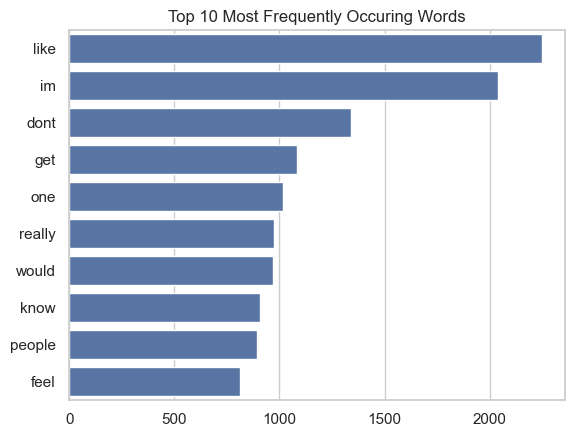

In [47]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

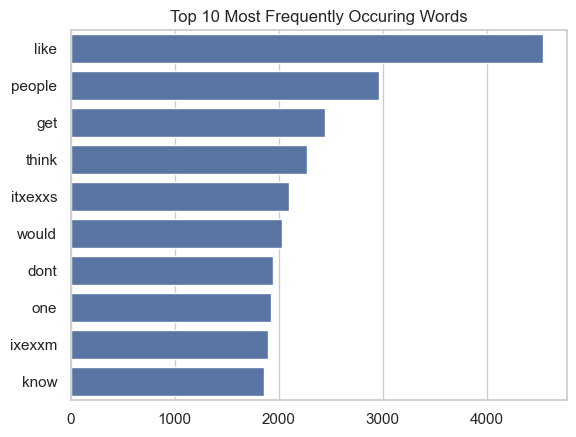

In [48]:
sns.barplot(x=freq23, y=words23)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [49]:
# most frequently occuring N_grams
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df_2022_freq['text'])

In [50]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

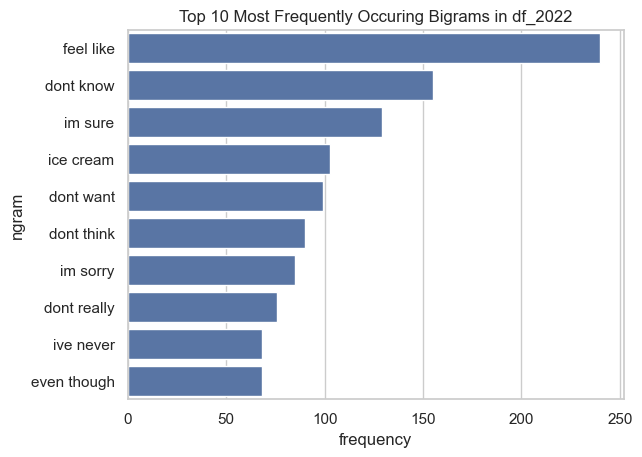

In [51]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams in df_2022')
plt.show()

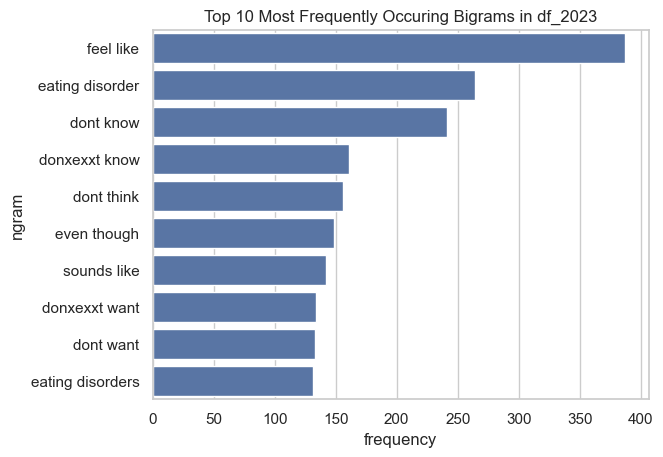

In [52]:
# Bigrams for 2023
# most frequently occuring N_grams
cv23 = CountVectorizer(ngram_range=(2,2))
bigrams = cv23.fit_transform(df_2023_freq['text'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv23.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams in df_2023')
plt.show()

In [53]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df_2022_freq['text'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

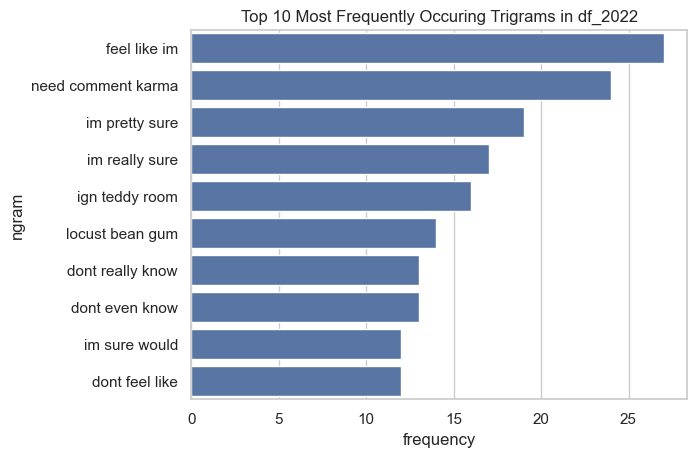

In [54]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams in df_2022')
plt.show()

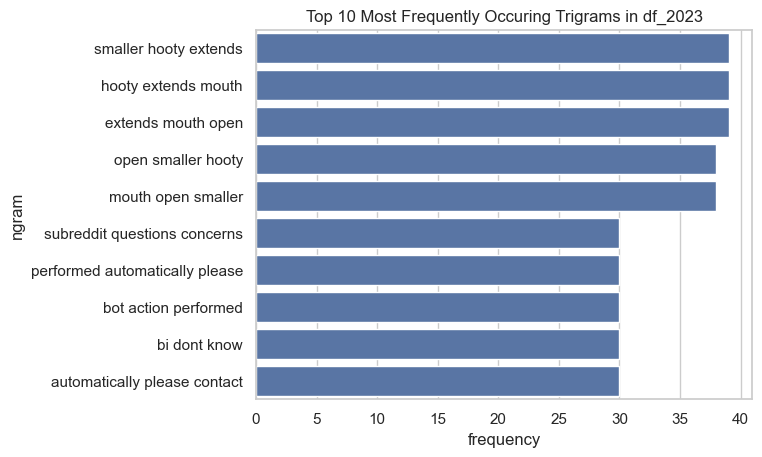

In [55]:
cv1_23 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1_23.fit_transform(df_2023_freq['text'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1_23.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams in df_2023')
plt.show()

In [56]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize


In [57]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aaryanpotdar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
def generate_trigrams(text):
    tokens = word_tokenize(text)
    return list(ngrams(tokens, 3))

In [59]:
df_2022_freq['trigrams'] = df_2022_freq['text'].apply(generate_trigrams)


In [60]:
from collections import Counter

all_trigrams = [trigram for sublist in df_2022_freq['trigrams'] for trigram in sublist]

trigram_freq = Counter(all_trigrams)

top_10_trigrams = trigram_freq.most_common(10)

In [61]:
top_10_trigrams

[(('feel', 'like', 'im'), 27),
 (('im', 'gon', 'na'), 25),
 (('need', 'comment', 'karma'), 24),
 (('im', 'pretty', 'sure'), 19),
 (('im', 'really', 'sure'), 17),
 (('ign', 'teddy', 'room'), 16),
 (('locust', 'bean', 'gum'), 14),
 (('dont', 'even', 'know'), 13),
 (('dont', 'really', 'know'), 13),
 (('im', 'sure', 'would'), 12)]

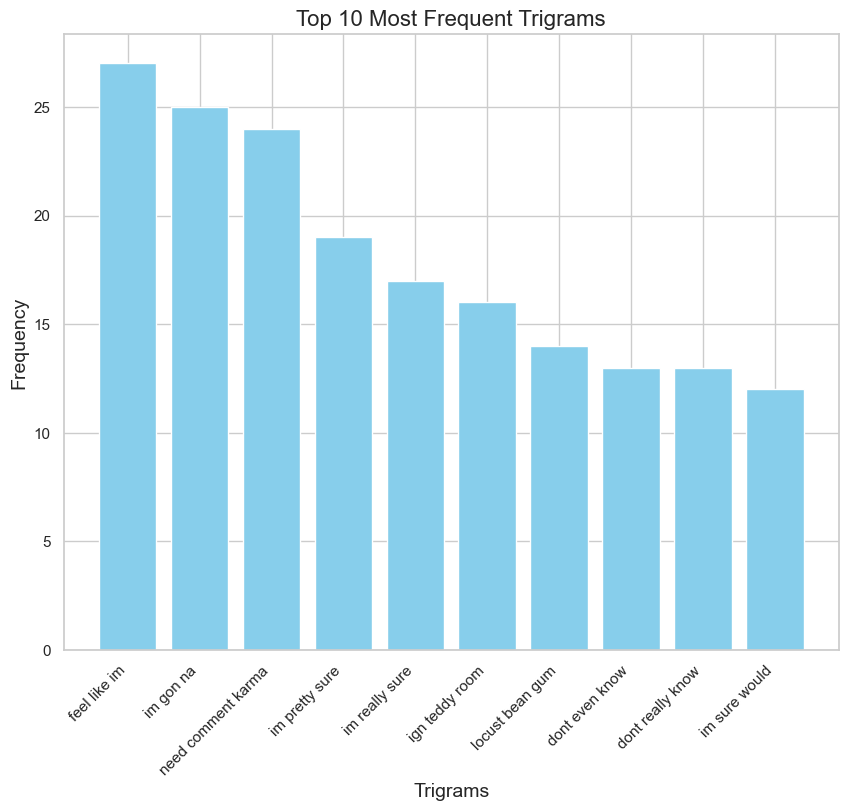

In [62]:
import matplotlib.pyplot as plt

trigrams, frequencies = zip(*top_10_trigrams)

trigram_labels = [' '.join(trigram) for trigram in trigrams]

plt.figure(figsize=(10, 8))
plt.bar(trigram_labels, frequencies, color='skyblue')
plt.xlabel('Trigrams', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Frequent Trigrams', fontsize=16)
plt.show()


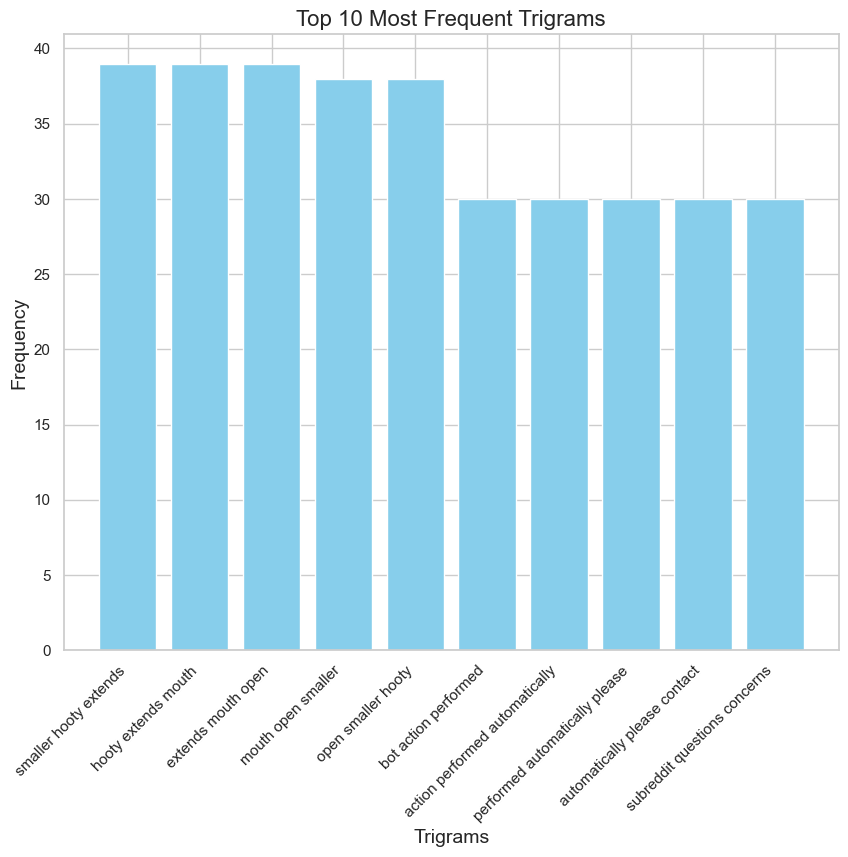

In [63]:
df_2023_freq['trigrams'] = df_2023_freq['text'].apply(generate_trigrams)

# retrieve top 10 trigrams for 2023
all_trigrams = [trigram for sublist in df_2023_freq['trigrams'] for trigram in sublist]

trigram_freq = Counter(all_trigrams)

top_10_trigrams = trigram_freq.most_common(10)

# plot
trigrams, frequencies = zip(*top_10_trigrams)

trigram_labels = [' '.join(trigram) for trigram in trigrams]

plt.figure(figsize=(10, 8))
plt.bar(trigram_labels, frequencies, color='skyblue')
plt.xlabel('Trigrams', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Frequent Trigrams', fontsize=16)
plt.show()